In [13]:
import pandas as pd, numpy as np
import glob
import os
import csv
# 一次性merge多个pct_chg
from functools import reduce
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

In [14]:
from plotly.graph_objs import Scatter,Layout
import plotly
import plotly.offline as py
import numpy as np
import plotly.graph_objs as go

#setting offilne
plotly.offline.init_notebook_mode(connected=True)

https://www.joinquant.com/view/community/detail/32c1dfe4e9d62b6a59934f59a6d18c82

In [18]:
def select_df_from_db_by_tickers(path, ticker_list):
    # e.g. ch_db_path = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/CH_database/"
    csv_path = path+"*.csv"
    files = glob.glob(csv_path)
    
    tickers_data = []
    if len(ticker_list)!=1:
        for ticker in ticker_list:
            print("Reading: ", ticker)
            df = pd.read_csv(path+ticker+".csv")
            tickers_data.append(df)
        tickers_data_concated = pd.concat(tickers_data)
        tickers_data_concated.reset_index(inplace=True)
        del tickers_data_concated['index']
    else:
        df = pd.read_csv(path+ticker_list[0]+".csv")
        tickers_data_concated = df
    return tickers_data_concated


def get_df_date_price_code(path, ticker_list, date_col, price_col, code_col):
    # for etf data cols are 'date', 'close', 'code'
    ticker_df_list = []
    for ticker in ticker_list:
        print("Reading Assets: ", ticker)
        try:
            ticker_df = pd.read_csv(path+ticker+".csv")
            ticker_df = ticker_df.sort_values(date_col)
            ticker_df = ticker_df[[date_col, price_col, code_col]]
            ticker_df['pct_chg'] = ticker_df[price_col].pct_change()
            ticker_df = ticker_df[[date_col, 'pct_chg']].dropna()
            ticker_df.columns = [date_col,ticker]
            ticker_df[date_col] = pd.to_datetime(ticker_df[date_col])
            ticker_df_list.append(ticker_df)
        except:
            pass
    return ticker_df_list


def get_df_date_price_code_returns(path, ticker_list, date_col, price_col, code_col):
    # for etf data cols are 'date', 'close', 'code'
    ticker_df_list = []
    for ticker in ticker_list:
        print("Reading Assets: ", ticker)
        try:
            ticker_df = pd.read_csv(path+ticker+".csv")
            ticker_df = ticker_df.sort_values(date_col)
            ticker_df = ticker_df[[date_col, price_col, code_col]]
            ticker_df['pct_chg'] = ticker_df[price_col].pct_change()
            ticker_df['cum_returns'] = ticker_df['pct_chg'].cumsum()
            ticker_df = ticker_df[[date_col, 'cum_returns']].dropna()
            ticker_df.columns = [date_col,ticker]
            ticker_df[date_col] = pd.to_datetime(ticker_df[date_col])
            ticker_df_list.append(ticker_df)
        except:
            pass
    return ticker_df_list


# 先为之后使用reduce铺路：创造一个merge的函数，这里的目的是为了将多资产数据基于date_col进行merge：
def merge_df(df1, df2, date_col="date"):
    # By default the etf's date_col goes by 'date'
    merged = df1.merge(df2, on = date_col, how = 'outer')
    merged.sort_values(date_col, inplace = True)
    return merged

def merge_df_for_corr(ticker_df_list, date_col):
    # Here below merge_df is a function instead of a variable
    
    merged_all = reduce(merge_df, ticker_df_list)
    # For etf data the date col is 'date'
    merged_all.set_index(date_col, inplace=True)
    merged_all.dropna(how="all", axis = 1, inplace = True)
    return merged_all

In [15]:
selected_ETF_pool = pd.read_csv("selected_ETF_pool.csv")

In [22]:
selected_ETF_pool_list = list(selected_ETF_pool['code'].astype(str))
selected_ETF_pool_list

['511220',
 '511030',
 '511010',
 '513500',
 '513100',
 '513680',
 '510680',
 '159941',
 '511270',
 '510430',
 '513900',
 '510090',
 '513030',
 '510020',
 '511020',
 '510110',
 '510580',
 '159935',
 '510380',
 '159908',
 '512560',
 '159933',
 '159953',
 '510170',
 '513600',
 '159913',
 '159932',
 '159918',
 '512600',
 '513050',
 '159920',
 '159951',
 '159960',
 '510500',
 '159944',
 '159916',
 '513660',
 '510560',
 '510270',
 '159901']

In [23]:
ch_db_path = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/CH_database/"
# ticker_list = ['511220',
#  '159926',
#  '511030',
#  '511280',
#  '511290',
#  '518880',
#  '511010',
#  '511310',
#  '511270',
#  '511020',
#  '513680',
#  '513500',
#  '513100',
#  '510120',
#  '513900',
#  '159941',
#  '510430',
#  '513030',
#  '510680',
#  '510090']
ticker_list = selected_ETF_pool_list
ticker_df_list = get_df_date_price_code(ch_db_path, ticker_list, "date", "close", "code")
merged_df = merge_df_for_corr(ticker_df_list, "date")

Reading Assets:  511220
Reading Assets:  511030
Reading Assets:  511010
Reading Assets:  513500
Reading Assets:  513100
Reading Assets:  513680
Reading Assets:  510680
Reading Assets:  159941
Reading Assets:  511270


/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/pandas/compat/_optional.py:106: UserWarning:

Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).



Reading Assets:  510430
Reading Assets:  513900
Reading Assets:  510090
Reading Assets:  513030
Reading Assets:  510020
Reading Assets:  511020
Reading Assets:  510110
Reading Assets:  510580
Reading Assets:  159935
Reading Assets:  510380
Reading Assets:  159908
Reading Assets:  512560
Reading Assets:  159933
Reading Assets:  159953
Reading Assets:  510170
Reading Assets:  513600
Reading Assets:  159913
Reading Assets:  159932
Reading Assets:  159918
Reading Assets:  512600
Reading Assets:  513050
Reading Assets:  159920
Reading Assets:  159951
Reading Assets:  159960
Reading Assets:  510500
Reading Assets:  159944
Reading Assets:  159916
Reading Assets:  513660
Reading Assets:  510560
Reading Assets:  510270
Reading Assets:  159901


In [24]:
ticker_df_returns_list = get_df_date_price_code_returns(ch_db_path, ticker_list, "date", "close", "code")
merged_df_returns = merge_df_for_corr(ticker_df_returns_list, "date")

Reading Assets:  511220
Reading Assets:  511030
Reading Assets:  511010
Reading Assets:  513500
Reading Assets:  513100
Reading Assets:  513680
Reading Assets:  510680
Reading Assets:  159941
Reading Assets:  511270
Reading Assets:  510430
Reading Assets:  513900
Reading Assets:  510090
Reading Assets:  513030
Reading Assets:  510020
Reading Assets:  511020
Reading Assets:  510110
Reading Assets:  510580
Reading Assets:  159935
Reading Assets:  510380
Reading Assets:  159908
Reading Assets:  512560
Reading Assets:  159933
Reading Assets:  159953
Reading Assets:  510170
Reading Assets:  513600
Reading Assets:  159913
Reading Assets:  159932
Reading Assets:  159918
Reading Assets:  512600
Reading Assets:  513050
Reading Assets:  159920
Reading Assets:  159951
Reading Assets:  159960
Reading Assets:  510500
Reading Assets:  159944
Reading Assets:  159916
Reading Assets:  513660
Reading Assets:  510560
Reading Assets:  510270
Reading Assets:  159901


Text(0.5, 1.0, 'Cumulative Returns on 40 ETFs')

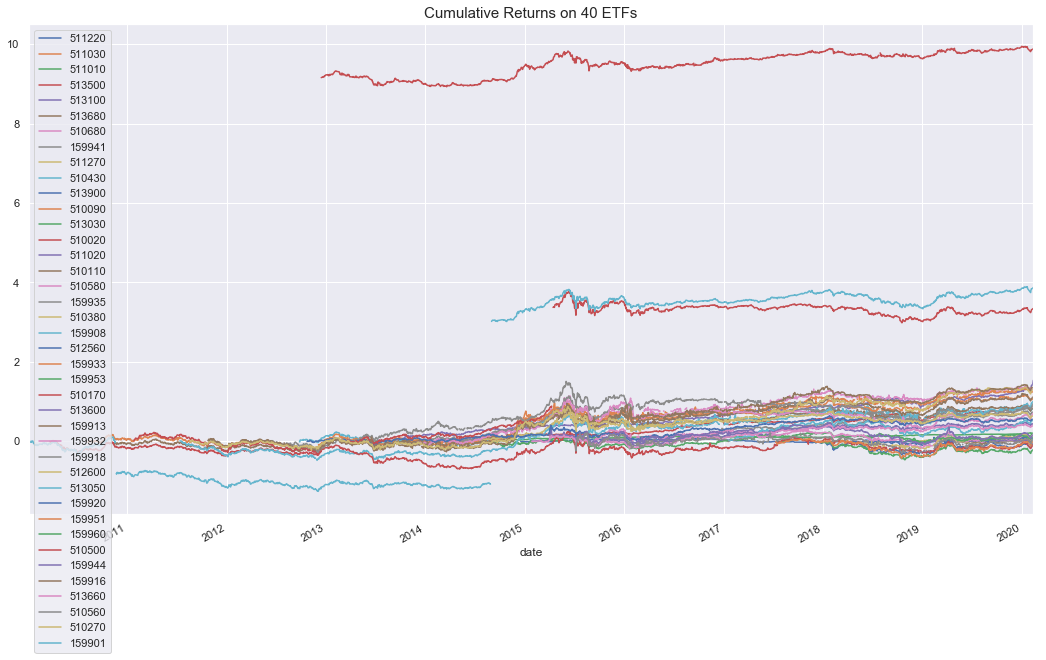

In [26]:
merged_df_returns.plot(figsize = (18, 10))
plt.title("Cumulative Returns on 40 ETFs", fontsize = 15)

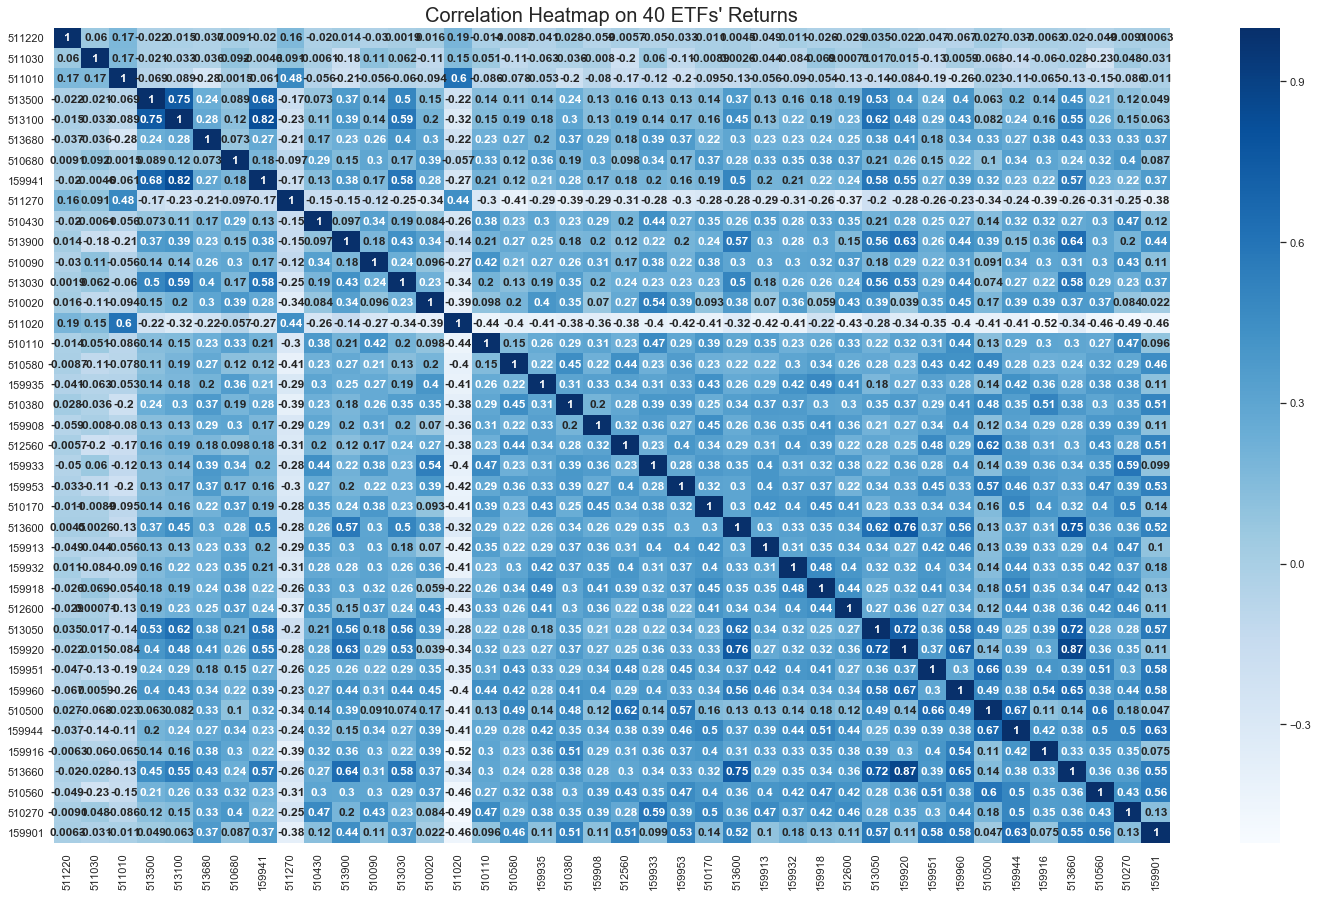

In [140]:
fig = plt.figure(figsize = (25, 15))
ax = fig.add_subplot(111)
ax = sns.heatmap(merged_df.corr(),\
                annot=True, annot_kws={'size':12, 'weight': 'bold'}, cmap = 'Blues')
plt.title("Correlation Heatmap on 40 ETFs' Returns", fontsize = 20);

In [28]:
from scipy.optimize import minimize

def get_smart_weight(pct, method='risk parity', cov_adjusted=False, wts_adjusted=False):
    if cov_adjusted == False:
        #协方差矩阵
        cov_mat = pct.cov()
    else:
        #调整后的半衰协方差矩阵
        cov_mat = pct.iloc[:len(pct)/4].cov()*(1/10.) + pct.iloc[len(pct)/4+1:len(pct)/2].cov()*(2/10.) +\
            pct.iloc[len(pct)/2+1:len(pct)/4*3].cov()*(3/10.) + pct.iloc[len(pct)/4*3+1:].cov()*(4/10.)
    if not isinstance(cov_mat, pd.DataFrame):
        raise ValueError('cov_mat should be pandas DataFrame！')
        
    omega = np.matrix(cov_mat.values)  # 协方差矩阵

    a, b = np.linalg.eig(np.array(cov_mat)) #a为特征值,b为特征向量
    a = np.matrix(a)
    b = np.matrix(b)
    # 定义目标函数
    
    def fun1(x):
        tmp = (omega * np.matrix(x).T).A1
        risk = x * tmp/ np.sqrt(np.matrix(x) * omega * np.matrix(x).T).A1[0]
        delta_risk = [sum((i - risk)**2) for i in risk]
        return sum(delta_risk)
    
    def fun2(x):
        tmp = (b**(-1) * omega * np.matrix(x).T).A1
        risk = (b**(-1)*np.matrix(x).T).A1 * tmp/ np.sqrt(np.matrix(x) * omega * np.matrix(x).T).A1[0]
        delta_risk = [sum((i - risk)**2) for i in risk]
        return sum(delta_risk)
    
    # 初始值 + 约束条件 
    x0 = np.ones(omega.shape[0]) / omega.shape[0]  
    bnds = tuple((0,None) for x in x0)
    cons = ({'type':'eq', 'fun': lambda x: sum(x) - 1})
    options={'disp':False, 'maxiter':1000, 'ftol':1e-20}
        
    if method == 'risk parity':
        res = minimize(fun1, x0, bounds=bnds, constraints=cons, method='SLSQP', options=options)
    elif method == 'pc risk parity':
        res = minimize(fun2, x0, bounds=bnds, constraints=cons, method='SLSQP', options=options)
    else:
        raise ValueError('method error！！！')
        
    # 权重调整
    if res['success'] == False:
        # print res['message']
        pass
    wts = pd.Series(index=cov_mat.index, data=res['x'])
    
    if wts_adjusted == True:
        wts[wts < 0.0001]=0.0
        wts = wts / wts.sum()
    elif wts_adjusted == False:
        wts = wts / wts.sum()
    else:
        raise ValueError('wts_adjusted should be True/False！')
        
    risk = pd.Series(wts * (omega * np.matrix(wts).T).A1 / np.sqrt(np.matrix(wts) * omega * np.matrix(wts).T).A1[0],index = cov_mat.index)
    risk[risk<0.0] = 0.0
    return wts,risk

In [29]:
wts, risk = get_smart_weight(merged_df, method='risk parity', cov_adjusted=False, wts_adjusted=False)

In [30]:
df_wts = pd.DataFrame(wts)
df_wts.reset_index(inplace = True)
df_wts.columns = ['ETF', 'Portfolio_Weight']

In [31]:
df_wts

,ETF,Portfolio_Weight
0,511220,1.014617e-01
1,511030,1.690304e-01
2,511010,1.626272e-01
3,513500,1.242117e-02
4,513100,9.756148e-03
5,513680,9.478557e-03
6,510680,4.523385e-03
7,159941,8.564650e-03
8,511270,3.552064e-01
9,510430,4.603600e-03


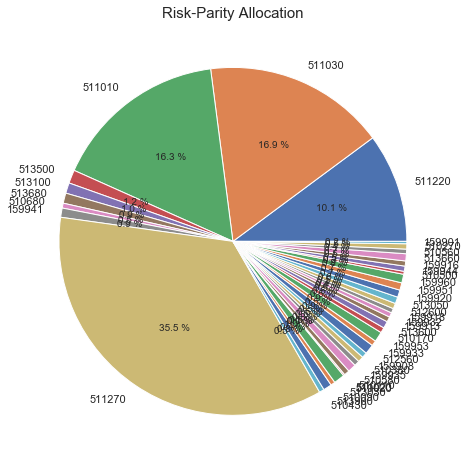

In [32]:
etfs = list(df_wts['ETF'])
weights = list(df_wts['Portfolio_Weight'])
# 保证圆形
plt.figure(1, figsize = (8, 8))
plt.axes(aspect=1)
plt.pie(x=weights, labels=etfs, autopct='%3.1f %%')
plt.title("Risk-Parity Allocation", fontsize = 15)
plt.show()

In [42]:
# int(200000*0.14/101.837)*2 #511030 - 20200108
# int(200000*0.012/1.04)*2 #513900 - 20200110
# int(200000*0.015/2.02)*2 #159942 - 20200110
# int(200000*0.141/119.7)*2 #511010 - 20200113进仓

# int(200000*0.141/119.7)*2 #511290 - 20200115进仓 - 万家50，弃，波动性太大
# 159926 国债ETF：弃，原因：日波动太大
# 510120 非洲short弃，原因：日波动太大

int(200000*0.149/105.370)*2 #511270 #进：十年地债,太高，观望
# 159941 纳指：close the position: 20200203
# 518880: 黄金ETF本应该进，但是弃，原因：gap太频繁，日波动太大
# 159941 纳指：20200205多信号，但太高，观察
# 513100 纳指：20200205多信号，但太高，观察，问题：两者选其一应该选哪个？
# 513500：标普500，20200206多信号，但太高，观察
# 513030: 德国30:多信号，金仓：流动性有待观察，已进仓 
# int(200000*0.017/1.108)*2

# # 159951中关村A 20200212 多信号：仓位自行决定，5%
# print('数量',int(200000*0.05/0.908), '代码：159951','是否执行：已进多仓，流动性偏低，收盘前补齐了剩下3800股','执行日期：20200213')
# # 159932 500深ETF 20200212 多信号：仓位自行决定，5%
# print('数量',int(200000*0.05/1.58), '代码：159932','是否执行：已进多仓，流动性偏低','执行日期：20200213')

print('数量',int(200000*0.008972*2/0.846), '代码：512560 中证军工','是否执行：waiting','执行日期：20200214')
print('数量',int(200000*0.004953*2/1.75), '代码：510170 商品ETF','是否执行：waiting','执行日期：20200214')
print('数量',int(200000*0.004182*2/1.637), '代码：159918 中创400','是否执行：waiting','执行日期：20200214')

数量 4242 代码：512560 中证军工 是否执行：waiting 执行日期：20200214
数量 1132 代码：510170 商品ETF 是否执行：waiting 执行日期：20200214
数量 1021 代码：159918 中创400 是否执行：waiting 执行日期：20200214


In [38]:
df_wts[df_wts['ETF']=='512560']

,ETF,Portfolio_Weight
20,512560,0.008972


In [40]:
df_wts[df_wts['ETF']=='510170']

,ETF,Portfolio_Weight
23,510170,0.004953


In [39]:
df_wts[df_wts['ETF']=='159918']

,ETF,Portfolio_Weight
27,159918,0.004182


In [47]:
date = [
    "2020-01-02",
    "2020-01-03",
    "2020-01-06",
    "2020-01-07",
    "2020-01-08",
    "2020-01-09",
    "2020-01-10",
    "2020-01-13",
    "2020-01-14",
    "2020-01-15",
    "2020-01-16",
    "2020-01-17",
    "2020-01-20",
    "2020-01-21",
    "2020-01-22",
    "2020-01-23",
    "2020-02-03",
    "2020-02-04",
    "2020-02-05",
    "2020-02-06",
    "2020-02-07",
    "2020-02-10",
    "2020-02-11",
    "2020-02-12",
    "2020-02-13",
    "2020-02-14",
]

In [106]:
sbtv1 = [0+1,#1/2
        0+1,
        0+1,
        0+1,
        -0.005/100+1,
        -0.001/100+1,
        0.01/100+1,
        0.01/100+1,
        0.03/100+1,
        0.02/100+1,
        -0.03/100+1,
        0.06/100+1,
        0.07/100+1,
        0.13/100+1,
        0.0795/100+1,
        0.2/100+1,
        0.68136/100+1,
         710/200000+1,#2/4
         824.42/200000+1,#2/5
         654.42/200000+1,#2/6
         745.42/200000+1,#2/7
         833/200000+1,#2/8
         933/200000+1,#2/11
         911/200000+1,
         676.53/200000+1,
         882.52/200000+1
        ]

In [66]:
sh_index = pd.read_csv(ch_db_path+"sh000001.csv")

In [67]:
sh_index

,trade_date,open,high,low,close,volume,ts_code
0,1990-12-20,104.3000,104.3900,99.9800,104.3900,197.0,sh000001
1,1990-12-21,109.0700,109.1300,103.7300,109.1300,28.0,sh000001
2,1990-12-24,113.5700,114.5500,109.1300,114.5500,32.0,sh000001
3,1990-12-25,120.0900,120.2500,114.5500,120.2500,15.0,sh000001
4,1990-12-26,125.2700,125.2700,120.2500,125.2700,100.0,sh000001
...,...,...,...,...,...,...,...
7120,2020-02-10,2860.4990,2891.8479,2851.0503,2890.4878,294929784.0,sh000001
7121,2020-02-11,2894.5414,2913.8159,2882.2428,2901.6744,269168335.0,sh000001
7122,2020-02-12,2895.5561,2926.8991,2892.4240,2926.8991,248733429.0,sh000001
7123,2020-02-13,2927.1443,2935.4060,2901.2425,2906.0735,274804844.0,sh000001


In [68]:
sh_index['pct_chg'] = sh_index['close'].pct_change()
sh_index_2020 = sh_index[sh_index['trade_date']>='2020-01-02']
sh_index_2020['adjusted_pct_chg'] = sh_index_2020['pct_chg']
sh_index_2020['adjusted_pct_chg'].values[0] = 0
sh_index_2020['cum_sum_pct_chg'] = sh_index_2020['adjusted_pct_chg'].cumsum()+1

In [80]:
sh_index_2020

,trade_date,open,high,low,close,volume,ts_code,pct_chg,adjusted_pct_chg,cum_sum_pct_chg
7099,2020-01-02,3066.3357,3098.1001,3066.3357,3085.1976,292470208.0,sh000001,0.011499,0.000000,1.000000
7100,2020-01-03,3089.0220,3093.8192,3074.5178,3083.7858,261496667.0,sh000001,-0.000458,-0.000458,0.999542
7101,2020-01-06,3070.9088,3107.2032,3065.3088,3083.4083,312575842.0,sh000001,-0.000122,-0.000122,0.999420
7102,2020-01-07,3085.4882,3105.4507,3084.3290,3104.8015,276583111.0,sh000001,0.006938,0.006938,1.006358
7103,2020-01-08,3094.2389,3094.2389,3059.1313,3066.8925,297872553.0,sh000001,-0.012210,-0.012210,0.994148
7104,2020-01-09,3082.6398,3097.3291,3080.1313,3094.8819,243435649.0,sh000001,0.009126,0.009126,1.003275
7105,2020-01-10,3102.2938,3105.2248,3081.3961,3092.2907,210442462.0,sh000001,-0.000837,-0.000837,1.002437
7106,2020-01-13,3091.4930,3115.5696,3075.3837,3115.5696,210621004.0,sh000001,0.007528,0.007528,1.009965
7107,2020-01-14,3120.6669,3127.1692,3105.6049,3106.8204,229973769.0,sh000001,-0.002808,-0.002808,1.007157
7108,2020-01-15,3103.1749,3107.9426,3082.0425,3090.0379,202313023.0,sh000001,-0.005402,-0.005402,1.001755


In [112]:
track_record = pd.DataFrame()
track_record['date'] = date
track_record['sbtv1'] = sbtv1
track_record['sh_mkt'] = sh_index_2020['cum_sum_pct_chg'].values
track_record.index = pd.to_datetime(track_record['date'])
del track_record['date']

track_record['returns0'] = track_record['sbtv1'].diff()
track_record['returns0'].values[0] = 0
track_record['returns1'] = track_record['sh_mkt'].diff()
track_record['returns1'].values[0] = 0

In [109]:
# track_record.to_csv("20200102_SBTV1_performance.csv")

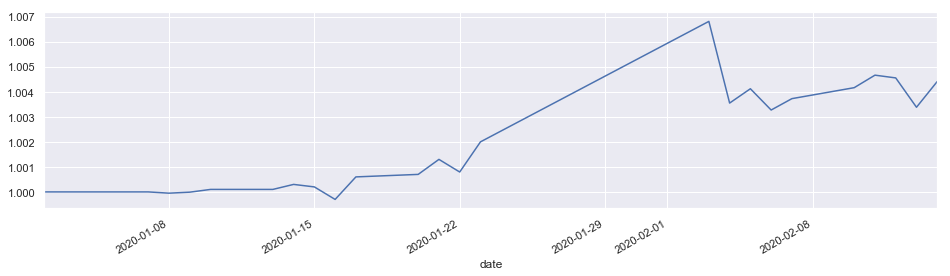

In [114]:
track_record['sbtv1'].plot(figsize = [16,4])

In [115]:
track_record

,sbtv1,sh_mkt,returns0,returns1
date,,,,
2020-01-02,1.000000,1.000000,0.000000,0.000000
2020-01-03,1.000000,0.999542,0.000000,-0.000458
2020-01-06,1.000000,0.999420,0.000000,-0.000122
2020-01-07,1.000000,1.006358,0.000000,0.006938
2020-01-08,0.999950,0.994148,-0.000050,-0.012210
2020-01-09,0.999990,1.003275,0.000040,0.009126
2020-01-10,1.000100,1.002437,0.000110,-0.000837
2020-01-13,1.000100,1.009965,0.000000,0.007528
2020-01-14,1.000300,1.007157,0.000200,-0.002808


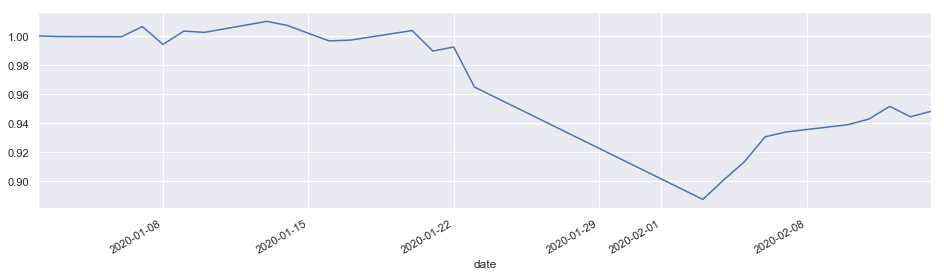

In [116]:
track_record['sh_mkt'].plot(figsize = [16,4])

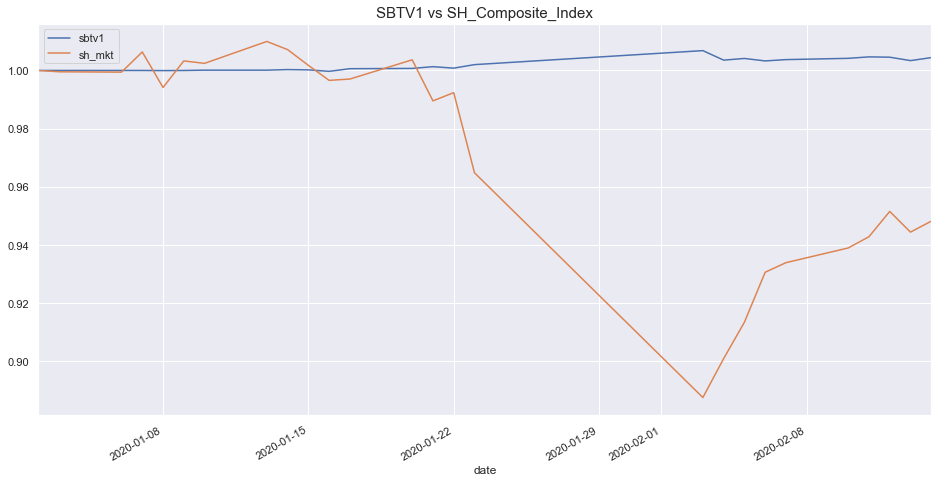

In [117]:
track_record[['sbtv1','sh_mkt']].plot(figsize = [16,8])
plt.title("SBTV1 vs SH_Composite_Index", fontsize = 15);

In [118]:
def create_sharpe_ratio(returns, periods=252):
    print("*****performance.py: 1. create_sharpe_ratio*****")
    """
    Create the Sharpe ratio for the strategy, based on a 
    benchmark of zero (i.e. no risk-free rate information).
    Parameters:
    returns - A pandas Series representing period percentage returns.
    periods - Daily (252), Hourly (252*6.5), Minutely(252*6.5*60) etc.
    """
    return np.sqrt(periods) * (np.mean(returns)) / np.std(returns)

def create_drawdowns(pnl):
    print("*****performance.py: 2. create_drawdowns*****")
    """
    Calculate the largest peak-to-trough drawdown of the PnL curve
    as well as the duration of the drawdown. Requires that the 
    pnl_returns is a pandas Series.
    Parameters:
    pnl - A pandas Series representing period percentage returns.
    Returns:
    drawdown, duration - Highest peak-to-trough drawdown and duration.
    """

    # Calculate the cumulative returns curve 
    # and set up the High Water Mark
    hwm = [0]

    # Create the drawdown and duration series
    idx = pnl.index
    drawdown = pd.Series(index = idx)
    duration = pd.Series(index = idx)

    # Loop over the index range
    for t in range(1, len(idx)):
        hwm.append(max(hwm[t-1], pnl[t]))
        drawdown[t]= (hwm[t]-pnl[t])
        duration[t]= (0 if drawdown[t] == 0 else duration[t-1]+1)
    return drawdown, drawdown.max(), duration.max()

def create_expected_annual_returns(pnl, periods=252):
    traded_days = len(pnl)
    last_pnl = pnl.values[-1]
    annual_returns = (1+last_pnl)**(periods/traded_days)-1
    return annual_returns

def create_total_returns(pnl):
    return pnl.values[-1]

In [119]:
# Calculate Alpha and Beta:

import statsmodels.api as sm
from statsmodels import regression

X = track_record['returns1'].values
Y = track_record['returns0'].values

def linreg(x, y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y, x).fit()
    
    x = x[:,1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X,Y)
print("alpha: ", str(alpha))
print("beta: ", str(beta))

alpha:  6.250219202353832e-05
beta:  -0.053823568115807865


- 计算alpha，beta

https://blog.csdn.net/CoderPai/article/details/82868280 

In [124]:
track_record

,sbtv1,sh_mkt,returns0,returns1
date,,,,
2020-01-02,1.000000,1.000000,0.000000,0.000000
2020-01-03,1.000000,0.999542,0.000000,-0.000458
2020-01-06,1.000000,0.999420,0.000000,-0.000122
2020-01-07,1.000000,1.006358,0.000000,0.006938
2020-01-08,0.999950,0.994148,-0.000050,-0.012210
2020-01-09,0.999990,1.003275,0.000040,0.009126
2020-01-10,1.000100,1.002437,0.000110,-0.000837
2020-01-13,1.000100,1.009965,0.000000,0.007528
2020-01-14,1.000300,1.007157,0.000200,-0.002808


In [132]:
sharpe_ratio0 = create_sharpe_ratio(track_record['returns0'], periods=252)
sharpe_ratio1 = create_sharpe_ratio(track_record['returns1'], periods=252)
drawdown0, max_drawdown0, max_dd_duration0 = create_drawdowns(track_record['sbtv1'])
drawdown1, max_drawdown1, max_dd_duration1 = create_drawdowns(track_record['sh_mkt'])
annual_returns0 = create_expected_annual_returns(track_record['sbtv1']-1)
annual_returns1 = create_expected_annual_returns(track_record['sh_mkt']-1)
total_returns0 = create_total_returns(track_record['sbtv1']-1)
total_returns1 = create_total_returns(track_record['sh_mkt']-1)
corr_returns0_1 = track_record['returns0'].corr(track_record['returns1'])
# jensen_alpha = total_returns0 - corr_returns0_1*total_returns1

*****performance.py: 1. create_sharpe_ratio*****
*****performance.py: 1. create_sharpe_ratio*****
*****performance.py: 2. create_drawdowns*****
*****performance.py: 2. create_drawdowns*****


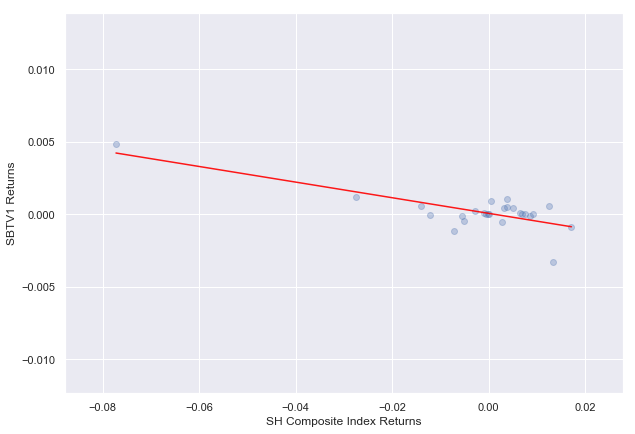

In [133]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2*beta+alpha

plt.figure(figsize=(10,7))
plt.scatter(X ,Y, alpha=0.3)
plt.xlabel("SH Composite Index Returns")
plt.ylabel("SBTV1 Returns")

plt.plot(X2, Y_hat, 'r', alpha=0.9)
plt.show()

In [134]:

print("=========================SBTV1策略=======================")
print("\n")
print("SBTV1策略 - 开始时间：2020-01-02")
print("SBTV1策略 - 当前时间：2020-02-14")
print("SBTV1策略 - 实时 绝对收益：", round(total_returns0*100, 2), "%")
print("SBTV1策略 - 实时 夏普比率：", round(sharpe_ratio0, 2))
print("SBTV1策略 - 实时 期望年化收益率：", round(annual_returns0, 4)*100, "%")
print("SBTV1策略 - 实时 最大回撤比率：", round(max_drawdown0*100,2), "%")
print("SBTV1策略 - 实时 最大回撤持续时间：", int(max_dd_duration0), "天")
print("SBTV1策略 - 实时 Beta：", round(beta, 4))
print("SBTV1策略 - 实时 超额收益Alpha：", round(total_returns0-total_returns1, 4))
print("SBTV1策略 - 实时 风险调整Alpha：", round(alpha, 6))
print("\n")
print("=========================上证指数=======================")
print("\n")
print("上证指数 - 开始时间：2020-01-02")
print("上证指数 - 当前时间：2020-02-14")
print("上证指数 - 实时 绝对收益：", round(total_returns1*100,2), "%")
print("上证指数 - 实时 夏普比率：", round(sharpe_ratio1, 2))
print("上证指数 - 实时 最大回撤比率：", round(max_drawdown1*100,2), "%")
print("上证指数 - 实时 最大回撤持续时间：", int(max_dd_duration1), "天")

=========================SBTV1策略=======================


SBTV1策略 - 开始时间：2020-01-02
SBTV1策略 - 当前时间：2020-02-14
SBTV1策略 - 实时 绝对收益： 0.44 %
SBTV1策略 - 实时 夏普比率： 2.16
SBTV1策略 - 实时 期望年化收益率： 4.36 %
SBTV1策略 - 实时 最大回撤比率： 0.35 %
SBTV1策略 - 实时 最大回撤持续时间： 9 天
SBTV1策略 - 实时 Beta： -0.0538
SBTV1策略 - 实时 超额收益Alpha： 0.0562
SBTV1策略 - 实时 风险调整Alpha： 6.3e-05


=========================上证指数=======================


上证指数 - 开始时间：2020-01-02
上证指数 - 当前时间：2020-02-14
上证指数 - 实时 绝对收益： -5.18 %
上证指数 - 实时 夏普比率： -1.79
上证指数 - 实时 最大回撤比率： 12.24 %
上证指数 - 实时 最大回撤持续时间： 18 天


In [135]:
my_strat_plot = go.Scatter(
    x = track_record.index,
    y = track_record['sbtv1'],
    name = 'SBTV1'
)
 
    
mkt_plot = go.Scatter(
    x = track_record.index,
    y = track_record['sh_mkt'],
    name = '上证指数累积收益率'
)
    
layout = dict(title = 'SBTV1',
              xaxis = dict(title = '时间'), # 横轴坐标
              yaxis = dict(title = '收益率'), # 总轴坐标
              legend=dict(x=1.1,y=1) # 图例位置 
              )

data = [my_strat_plot, mkt_plot]

fig = dict(data=data, layout=layout)

py.iplot(fig)

In [136]:
drawdown0

date
2020-01-02         NaN
2020-01-03    0.000000
2020-01-06    0.000000
2020-01-07    0.000000
2020-01-08    0.000050
2020-01-09    0.000010
2020-01-10    0.000000
2020-01-13    0.000000
2020-01-14    0.000000
2020-01-15    0.000100
2020-01-16    0.000600
2020-01-17    0.000000
2020-01-20    0.000000
2020-01-21    0.000000
2020-01-22    0.000505
2020-01-23    0.000000
2020-02-03    0.000000
2020-02-04    0.003264
2020-02-05    0.002692
2020-02-06    0.003542
2020-02-07    0.003086
2020-02-10    0.002649
2020-02-11    0.002149
2020-02-12    0.002259
2020-02-13    0.003431
2020-02-14    0.002401
dtype: float64

In [170]:
dd_plot = go.Scatter(
    x = track_record.index,
    y = drawdown0,
    name = 'SBTV1 Drawdown'
)
    
layout_dd = dict(title = 'SBTV1 Drawdown',
              xaxis = dict(title = '时间'), # 横轴坐标
              yaxis = dict(title = '回撤比率'), # 总轴坐标
              legend=dict(x=1.1,y=1) # 图例位置 
              )

data_dd = [dd_plot]

fig_dd = dict(data=data_dd, layout=layout_dd)

py.iplot(fig_dd)

In [97]:
risk

600519.SH    0.005639
601601.SH    0.005639
600111.SH    0.005639
dtype: float64

In [74]:
#获取指定周期的日期列表 'W、M、Q'
def get_period_date(df, peroid,start_date, end_date):
    #设定转换周期period_type  转换为周是'W',月'M',季度线'Q',五分钟'5min',12天'12D'
    stock_data = df.copy()
    stock_data['date']=stock_data.index
    #进行转换，周线的每个变量都等于那一周中最后一个交易日的变量值
    period_stock_data=stock_data.resample(peroid,how='last')
    date=period_stock_data.index
    pydate_array = date.to_pydatetime()
    date_only_array = np.vectorize(lambda s: s.strftime('%Y-%m-%d'))(pydate_array )
    date_only_series = pd.Series(date_only_array)
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    start_date=start_date-timedelta(days=1)
    start_date = start_date.strftime("%Y-%m-%d")
    date_list=date_only_series.values.tolist()
    date_list.insert(0,start_date)
    return date_list

In [113]:
pct_daily = merged_df.copy()
# pct_daily.dropna(inplace=True)
today = str(datetime.now().date())
date_list = get_period_date(merged_df, "M",'2010-01-01', today)[:-1]

pct_daily_new = pct_daily.copy()
pct_daily_new['date'] = pct_daily_new.index
pct_daily_new['pre_date'] = pct_daily_new['date'].shift(1)
pct_daily_new = pct_daily_new[pct_daily_new['pre_date'].map(lambda x: str(x)!="NaT")]
pct_daily_new['pre_date'] = pct_daily_new['pre_date'].apply(lambda x: pd.Timestamp(x))
pct_daily_new['date'] = pct_daily_new['date'].apply(lambda x: str(x)[:10])

/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  import sys


In [94]:
pct_daily_new['pre_date'].apply(lambda x: pd.Timestamp(x))[0]

Timestamp('2010-01-05 00:00:00')

In [95]:
pct_daily_new['pre_date'].values[0]

numpy.datetime64('2010-01-05T00:00:00.000000000')

In [112]:
str(pct_daily_new['date'].values[0])

'2010-01-06T00:00:00.000000000'

In [114]:
# def get_near_tradingday(date):
#     # Get the trading date before date
#     return (get_price('000001.XSHG',end_date=date,count=1).index[0])

# Re-define:
def get_near_tradingday(date, pct_daily_new):
#     print("getting thru")
    df = pct_daily_new[pct_daily_new['date']==date]
    print(date)
#     print("df:", df)
    df_pre_date = df['pre_date'].values[0]
    return df_pre_date

In [119]:
date

'2010-08-31'

In [121]:
pct_daily_new[pct_daily_new['date']==date]['pre_date'].values[0]

numpy.datetime64('2010-08-30T00:00:00.000000000')

In [132]:
get_near_tradingday(date_list[3],pct_daily_new)

2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30


numpy.datetime64('2010-03-30T00:00:00.000000000')

In [133]:
tradingday_list_tot = pct_daily.index.tolist()
# tradingday_list = [date for date in pct_daily.index.tolist()]
tradingday_list = [date for date in pct_daily.index.tolist() if ((date)>=get_near_tradingday(date_list[3],pct_daily_new) \
                                                                 and (date)<=get_near_tradingday(date_list[-1],pct_daily_new))]

2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                       

2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                       

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                       

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        dat

2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        dat

2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                       

2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                       

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                       

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                       

2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                       

df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                       

2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                       

2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                       

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        dat

2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                       

2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                       

2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        dat

df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                       

df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                       

2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                       

2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        dat

df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                       

df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                       

2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        dat

2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2019-12-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2019-12-31  -0.002361  -0.010719  -0.006416  2019-12-31 2019-12-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                            

In [134]:
pct_daily_new_ = pct_daily.reindex(tradingday_list) #回测期间的资产收益率
pct_daily_new_.head().append(pct_daily_new_.tail())

,600519.SH,601601.SH,600111.SH
trade_date,,,
2010-03-30,-0.010574,0.016180,0.042112
2010-03-31,-0.007812,0.000000,-0.005316
2010-04-01,0.008188,0.016667,0.006777
2010-04-02,-0.046420,-0.001090,0.006367
2010-04-06,-0.005176,-0.018599,0.013722
2019-12-24,-0.001131,-0.002432,0.028210
2019-12-25,-0.012456,-0.003250,-0.008515
2019-12-26,0.001235,0.006793,0.004771
2019-12-27,0.024579,-0.007287,0.029440


In [139]:
pct_daily.dropna(inplace = True)

In [143]:
weight_rp_df = pd.DataFrame()
risk_rp_df = pd.DataFrame()
weight_pcrp_df = pd.DataFrame()
risk_pcrp_df = pd.DataFrame()
t1=datetime.now()
for date in date_list[3:]:
    t2=datetime.now()
    print ('计算到%s,已耗时%s秒'%(date,(t2-t1).seconds))
    date_pre_y = tradingday_list_tot[tradingday_list_tot.index(get_near_tradingday(date, pct_daily_new))-240]
    weight_and_risk_rp = get_smart_weight(pct_daily.loc[date_pre_y:get_near_tradingday(date, pct_daily_new)],method='risk parity', cov_adjusted=0, wts_adjusted=1)#.reindex(pct_daily.columns).fillna(0)
    weight_rp_df.loc[:,get_near_tradingday(date, pct_daily_new)] = weight_and_risk_rp[0]
    risk_rp_df.loc[:,get_near_tradingday(date, pct_daily_new)] = weight_and_risk_rp[1]
    weight_and_risk_pcrp = get_smart_weight(pct_daily.loc[date_pre_y:get_near_tradingday(date, pct_daily_new)],method='pc risk parity', cov_adjusted=0, wts_adjusted=1)#.reindex(pct_daily.columns).fillna(0)
    weight_pcrp_df.loc[:,get_near_tradingday(date, pct_daily_new)] = weight_and_risk_pcrp[0]
    risk_pcrp_df.loc[:,get_near_tradingday(date, pct_daily_new)] = weight_and_risk_pcrp[1]

计算到2010-03-31,已耗时0秒
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30
2010-03-31
df:             600519.SH  601601.SH  600111.SH        date   pre_date
trade_date                                                        
2010-03-31  -0.007812        0.0  -0.005316  2010-03-31 2010-03-30


/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:7654: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


LinAlgError: Array must not contain infs or NaNs

In [177]:
weight_rp_df= weight_rp_df.T.reindex(tradingday_list).fillna(method='ffill')#风险平价模型的资产权重
weight_rp_df.head()

,511220,159926,511030,511280,511290,518880,511010,511310,511270,511020,513680,513500,513100,510120,513900,159941,510430,513030,510680,510090
2010-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
